In [75]:
from pathlib import Path
import pandas as pd

processed = Path('../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [76]:
selection_data = selection_data[selection_data.year >= 2015]

In [77]:
selection_data[['spot', 'home']].value_counts()

spot  home
1     1       577
      0       402
2     1       278
      0       212
3     1       198
      0       154
4     1        62
      0        46
5     1        14
      0         6
6     0         3
      1         2
dtype: int64

In [78]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

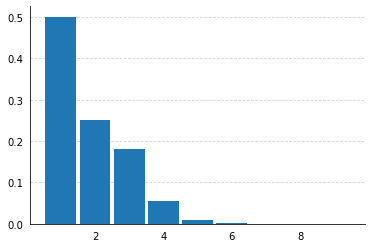

In [79]:
plot = selection_data['spot'].astype(float).hist(
    bins=9, range=(0.5,9.5), rwidth=0.9, density=True
)
adjust_plot(plot)


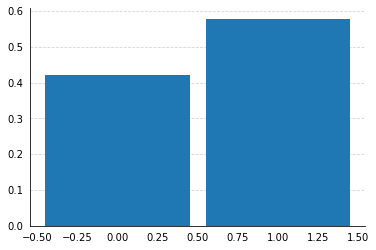

In [80]:
plot2 = selection_data['home'].astype(float).hist(density=True, bins=2, range=(-.5, 1.5), rwidth=0.9)
adjust_plot(plot2)

In [81]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

75.0%


In [82]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['L_year'] = df['year'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win']) | (df['year'] != df['L_year'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == False, 'streak_counter'] = 0
    
    return df

In [83]:
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

21

In [84]:
selection_data['EstProb'].describe()

count    1954.000000
mean        0.758773
std         0.020803
min         0.687295
25%         0.743847
50%         0.756114
75%         0.771361
max         0.827221
Name: EstProb, dtype: float64

In [54]:
# Reduce noise by using rolling windows to calculate moving averages over seasons for park records, batting records, and pitching records.
# Improve to weighted averages

# Start including data from current season 

# Use score from sci kit learn to evaluate models better

# Relief pitchers data

# Rest days

# Game Scores/ELOs

# Team ratings

# Better Pitcher overall ratings

# Clean up data to reduce size

# Set up S3 if necessary for size

# Check # training observations for each model fit 
# and make sure we aren't losing any

# Graphs of all the input variables to check for outliers

# Change hand metrics to 1/0

# Only drop NAs for variables in use

# Use same scaling on after data as before data